In [72]:
import loompy as lp
import numpy as np
import matplotlib.pyplot as plt

In [73]:

# gn_cir = np.array(['Cox6b1', 'Mdh1', 'Ndfip1', 'Ndfip2', 'Pitpnc1', 'Slc24a3',
#        'Stmn3'], dtype='<U16')
# gn_gou = np.array(['Adcy2', 'Atxn1', 'Cdh12', 'Edil3', 'Igf1r', 'Kcnk2', 'Mbnl2',
#        'Meg3', 'Plxna4', 'Satb1', 'Scai', 'Sez6l', 'Slc35f1'],
#       dtype='<U16')
# gn_ext = np.array(['App', 'Cyfip2', 'Gnaq', 'Grin2b', 'Gsk3b', 'Kifap3', 'Mycbp2',
#        'Prrc2c', 'Unc80'], dtype='<U16')

In [107]:

gn_ext = np.array(['Cyfip2', 'Gnaq', 'Gsk3b', 'Kifap3', 'Mycbp2',
       'Prrc2c', 'Unc80','Meg3','Mbnl2'], dtype='<U16')
gn_gou = np.array([ 'Atxn1', 'Cdh12', 'Edil3', 'Igf1r', 'Kcnk2', 
                   'Plxna4', 'Satb1',  'Sez6l', 'Slc35f1','Slc24a3'],
      dtype='<U16')
gn_cir = np.array(['Adcy2','Scai', 'Mdh1', 'Ndfip1', 'Ndfip2', 'Pitpnc1',
       'Stmn3'], dtype='<U16')

In [75]:
genes_list = list(np.concatenate((gn_ext,gn_gou,gn_cir)))


In [86]:
sample_lists = ["allen_C01_glu","allen_B08_glu","allen_H12_glu","allen_F08_glu"]
datadir = '/home/ggorin/count_data/loom_allen_celltype_kb/test/'

S = []
U = []
for sample in sample_lists:
    S_ = []
    U_ = []
    with lp.connect(datadir+sample+'.loom') as ds:
        for gene in genes_list:
#             print(gene)
            ind = np.where(ds.ra['gene_name']==gene)[0][0]
            S_.append(ds.layers['spliced'][ind].astype(int))
            U_.append(ds.layers['unspliced'][ind].astype(int))
        S_.append(ds.layers['spliced'][:].sum(0).astype(int))
        U_.append(ds.layers['unspliced'][:].sum(0).astype(int))
    S.append(np.asarray(S_))
    U.append(np.asarray(U_))

In [85]:
# S_[0].shape

(4820,)

In [118]:
gn_cir[0]

'Adcy2'

In [119]:
gn_gou[-1]

'Slc24a3'

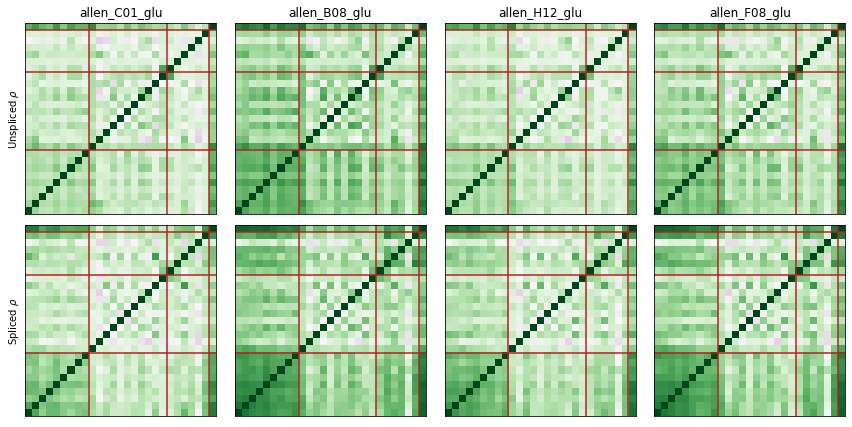

In [116]:
fig1,ax1 = plt.subplots(2,4,figsize=(12,6))
vmin = -1
vmax = 1

col = 'firebrick'
cmap = 'PRGn'

locs = [len(gn_ext)-0.5,len(gn_gou)+len(gn_ext)+0.5,len(gn_gou)+len(gn_ext)+len(gn_cir)-0.5]
lims = [-0.5,len(genes_list)+0.5]
# fig1,ax1 = plt.subplots(3,4,figsize=(10,8))
for i in range(4):
    ax1[0,i].imshow(np.corrcoef(U[i]),vmin=vmin,vmax=vmax,cmap=cmap)
    ax1[1,i].imshow(np.corrcoef(S[i]),vmin=vmin,vmax=vmax,cmap=cmap)
    ax1[0,i].invert_yaxis()
    ax1[1,i].invert_yaxis()
    ax1[0,i].set_title(sample_lists[i])
    if i==0:
        ax1[0,i].set_ylabel(r'Unspliced $\rho$')
        ax1[1,i].set_ylabel(r'Spliced $\rho$')
    
    for l in locs:
        ax1[0,i].plot([l]*2,lims,'-',color=col)
        ax1[0,i].plot(lims,[l]*2,'-',color=col)
        ax1[1,i].plot([l]*2,lims,'-',color=col)
        ax1[1,i].plot(lims,[l]*2,'-',color=col)
    ax1[0,i].set_xticks([])
    ax1[0,i].set_yticks([])
    ax1[1,i].set_xticks([])
    ax1[1,i].set_yticks([])
#     ax1[2,i].plot([np.corrcoef(np.vstack((U[i][j],S[i][j])))[0][1] for j in range(len(genes_list))])
fig1.tight_layout()